# Tokenize

In [47]:
import sys; sys.path.append('../..')
from abslithist import *
from abslithist.words import *

In [48]:
# fig.save(f'../../figures/fig.words_corr_with_trend.{VALTYPE}.{DSTART}-{DEND}.{VNUM}.png')
CNAME='CanonFiction'
VALTYPE='num_conc'
DSTART=1800
DEND=1900
VNUM='v6'
NMFW=10000
PERIOD_LEN=10
DISTFUNC='cosine'

In [49]:
C = lltk.load(CNAME)
t = C.texts()[0]
meta=C.metadata.set_index('id')

## Gather data

In [50]:
# C.save_freqs(tokenizer=tokenize,num_proc=4,desc='Computing frequencies')
# C.save_mfw()
# C.save_dtm(n=25000)

In [51]:
# Load
absconcd = get_absconc()
dtm=C.dtm
df=dtm=dtm[dtm.columns[:NMFW]]

## Count abs/conc using text freqs

In [52]:
def parse_row(row,ckeys=['abs','conc','neither']):
    dx = {}
    for ck in ckeys:
        dx[f'num_{ck}']=sum(row[w] for w in set(row.index) & absconcd[ck])
    dx['num_total'] = sum(dx.values())
    if not dx['num_total']: return {}
    dx['id']=row.name
    return dx

In [53]:
dfabsconc = pd.DataFrame(list(df.mapply(parse_row,axis=1))).set_index('id')

100%|██████████| 18/18 [00:13<00:00,  1.32it/s]


In [54]:
dfabsconc

,num_abs,num_conc,num_neither,num_total
id,,,,
Addison.Spectator,31423.0,7230.0,72743.0,111396.0
Ammianus.History,13532.0,3668.0,40713.0,57913.0
AngloSaxon.Beowulf,557.0,781.0,4424.0,5762.0
AngloSaxon.Dream of the Rood,61.0,45.0,258.0,364.0
Anon.1001Nights.1914,2857.0,2572.0,13674.0,19103.0
...,...,...,...,...
markmark.de Lint.The_Little_Country.1688,3644.0,6351.0,26468.0,36463.0
markmark.de Lint.Trader.1689,3038.0,4719.0,18646.0,26403.0
markmark.de Lint.Yarrow.1690,1488.0,3391.0,11727.0,16606.0


## Connect to freq data

In [55]:
dtm2 = dtm.join(dfabsconc,how='inner')
dtm3 = dtm2.join(meta[['year']],rsuffix='_meta')
dtm3['_dec'] = dtm3.year_meta//PERIOD_LEN*PERIOD_LEN
dtm3

,I,have,observed,that,a,reader,seldom,book,with,pleasure,...,silently,wiped,crystal,gracious,num_abs,num_conc,num_neither,num_total,year_meta,_dec
id,,,,,,,,,,,,,,,,,,,,,
Addison.Spectator,5954.0,2756.0,184.0,7542.0,10578.0,352.0,52.0,167.0,4077.0,216.0,...,1.0,2.0,6.0,5.0,31423.0,7230.0,72743.0,111396.0,1711,1710
Ammianus.History,385.0,638.0,9.0,2580.0,4248.0,4.0,4.0,21.0,2692.0,17.0,...,3.0,1.0,0.0,0.0,13532.0,3668.0,40713.0,57913.0,391,390
AngloSaxon.Beowulf,204.0,51.0,0.0,430.0,398.0,0.0,1.0,0.0,255.0,1.0,...,0.0,0.0,0.0,3.0,557.0,781.0,4424.0,5762.0,1000,1000
AngloSaxon.Dream of the Rood,41.0,4.0,0.0,27.0,15.0,0.0,0.0,0.0,26.0,0.0,...,0.0,0.0,0.0,0.0,61.0,45.0,258.0,364.0,900,900
Anon.1001Nights.1914,1749.0,389.0,13.0,936.0,1416.0,0.0,1.0,2.0,837.0,29.0,...,0.0,1.0,3.0,0.0,2857.0,2572.0,13674.0,19103.0,900,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
markmark.de Lint.The_Little_Country.1688,1413.0,656.0,0.0,2994.0,4165.0,3.0,0.0,231.0,1223.0,8.0,...,5.0,6.0,1.0,0.0,3644.0,6351.0,26468.0,36463.0,1991,1990
markmark.de Lint.Trader.1689,3431.0,666.0,0.0,2122.0,3279.0,0.0,0.0,18.0,1083.0,2.0,...,1.0,1.0,0.0,0.0,3038.0,4719.0,18646.0,26403.0,1997,1990
markmark.de Lint.Yarrow.1690,628.0,225.0,1.0,1151.0,1857.0,1.0,0.0,44.0,625.0,13.0,...,3.0,1.0,0.0,0.0,1488.0,3391.0,11727.0,16606.0,1989,1980


## Summarize by group

In [56]:
def parse_group(dfgroup):
    dfsum=dfgroup.sum()
    return pd.DataFrame(dfsum / dfsum.num_total).T

In [57]:
dfdone = pmap_groups(
    parse_group,
    dtm3.query(f'{DSTART}<=year_meta<{DEND}').groupby('_dec'),
    use_cache=True,
    num_proc=4
)
dfdone

Mapping parse_group [x4]: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]


,I,have,observed,that,a,reader,seldom,book,with,pleasure,...,cheered,silently,wiped,crystal,gracious,num_abs,num_conc,num_neither,num_total,year_meta
_dec,,,,,,,,,,,,,,,,,,,,,
1800,0.083950,0.025796,0.001099,0.062762,0.091196,0.000391,0.000463,0.000749,0.038412,0.001544,...,0.000041,0.000046,0.000023,0.000015,0.000075,0.308285,0.054075,0.637639,1.0,0.097529
1810,0.068039,0.024979,0.000739,0.056295,0.084901,0.000154,0.000289,0.000439,0.040132,0.001878,...,0.000037,0.000135,0.000037,0.000020,0.000166,0.258504,0.061875,0.679621,1.0,0.080000
1820,0.068435,0.021767,0.000815,0.057426,0.089508,0.000379,0.000333,0.000538,0.038776,0.000949,...,0.000045,0.000128,0.000050,0.000029,0.000130,0.234701,0.083135,0.682164,1.0,0.099236
1830,0.060816,0.021745,0.000787,0.050962,0.094610,0.000518,0.000343,0.000558,0.040273,0.000911,...,0.000053,0.000131,0.000045,0.000052,0.000117,0.215092,0.094910,0.689998,1.0,0.101727
1840,0.057689,0.021484,0.000649,0.051899,0.099839,0.000580,0.000280,0.000655,0.041151,0.000801,...,0.000048,0.000183,0.000052,0.000045,0.000106,0.187292,0.115494,0.697215,1.0,0.111163
1850,0.070689,0.023372,0.000606,0.055069,0.098586,0.000427,0.000268,0.000922,0.041713,0.000852,...,0.000056,0.000210,0.000078,0.000039,0.000151,0.192611,0.109191,0.698198,1.0,0.076441
1860,0.079362,0.024446,0.000430,0.062311,0.102034,0.000321,0.000184,0.000778,0.042338,0.000659,...,0.000052,0.000217,0.000089,0.000048,0.000139,0.182195,0.116075,0.701730,1.0,0.072986
1870,0.078245,0.026072,0.000490,0.070571,0.112409,0.000333,0.000194,0.000800,0.042574,0.000734,...,0.000054,0.000175,0.000078,0.000046,0.000174,0.202946,0.108591,0.688463,1.0,0.084759
1880,0.074685,0.026394,0.000618,0.069813,0.109448,0.000181,0.000190,0.000705,0.042073,0.000798,...,0.000043,0.000174,0.000057,0.000032,0.000126,0.180524,0.124118,0.695358,1.0,0.065470


In [58]:
dfdone['abs-conc']=dfdone['num_abs']-dfdone['num_conc']
dfdone['abs/conc']=dfdone['num_abs']/dfdone['num_conc']

In [59]:
# for col in dfdone.columns: dfdone[col]=zscore(dfdone[col])

## Filter for field words

In [60]:
dfdoneT=dfdone.T
fields=get_allfields()
words = fields[DEFAULT_ABS_FIELD] | fields[DEFAULT_CONC_FIELD] | fields[DEFAULT_NEITHER_FIELD]
valtypes = {x for x in dfdoneT.index if x.startswith('num_') or x in {'abs-conc','abs/conc'}}
dfdoneT=dfdoneT.reset_index()[dfdoneT.index.isin(
     words | valtypes
)].set_index('index')

## Compute distances

<AxesSubplot:xlabel='_dec'>

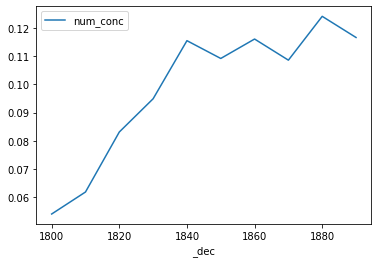

In [61]:
# CHeck what we're correlation against
dfdone.reset_index().plot(x='_dec',y=VALTYPE)

In [62]:
from fastdist import fastdist

res=fastdist.vector_to_matrix_distance(
    dfdoneT.loc[VALTYPE].values,
    dfdoneT.drop(VALTYPE).values,
    getattr(fastdist,DISTFUNC),
    DISTFUNC
)
res, len(res)

(array([0.88693106, 0.88717882, 0.87762187, ..., 0.97341296, 0.75121089,
        0.75361203]),
 8864)

In [63]:
word2corr=dict(zip(dfdoneT.index, res))
cordf=pd.DataFrame(word2corr.items(),columns=['word','corr']).sort_values('corr').dropna()
cordf['dist']=1-cordf['corr']
cordf

,word,corr,dist
2857,statira,0.236773,0.763227
2390,distempers,0.257385,0.742615
4027,maple,0.275367,0.724633
3681,conjurer,0.288456,0.711544
8445,accessary,0.290613,0.709387
...,...,...,...
1891,heavy,0.996869,0.003131
560,wide,0.997322,0.002678
1076,watch,0.997933,0.002067
72,dream,0.998140,0.001860


### Add other word data

In [64]:
# Get other data
with open('../../data/fields/data.word2origin.json') as f: word2year=json.load(f)
dfnorms = get_allnorms()
word2abs = dict(zip(dfnorms.index, dfnorms[DEFAULT_ABSCONC_CONTRAST]))

In [65]:
# Attach to cordf
cordf['year_origin']=cordf['word'].map(word2year)
cordf['absconc']=cordf['word'].map(word2abs)
cordf['absconc_grp']=cordf['absconc'].apply(decideifabs)
word2sum=dict(dtm.sum(axis='index'))
cordf['freq']=cordf.word.map(word2sum)
cordf['freq_log']=cordf['freq'].apply(math.log10)
cordf=cordf.query('year_origin>=1000')
cordf['corr_z']=zscore(cordf['corr'])
def dosign(x):
    if x>=1: return 'Significantly positive correlation'
    if x<=-1: return 'Significantly negative correlation'
    return None
cordf['sign']=cordf['corr_z'].apply(dosign)
cordf['sign']=pd.Categorical(cordf['sign'])
# cordf['sign'].cat.reorder_categories(['Significantly positive correlation','Significantly negative correlation'])
cordf=cordf.dropna()
cordf

,word,corr,dist,year_origin,absconc,absconc_grp,freq,freq_log,corr_z,sign
4027,maple,0.275367,0.724633,1366.0,2.534093,Concrete,1125.0,3.051153,-6.031175,Significantly negative correlation
8445,accessary,0.290613,0.709387,1480.0,-1.128043,Abstract,237.0,2.374748,-5.878902,Significantly negative correlation
1640,testy,0.323169,0.676831,1526.0,-0.175621,Neither,309.0,2.489958,-5.553732,Significantly negative correlation
7460,prepossession,0.349148,0.650852,1648.0,-1.903779,Abstract,286.0,2.456366,-5.294259,Significantly negative correlation
2946,templar,0.358664,0.641336,1588.0,0.738044,Neither,329.0,2.517196,-5.199207,Significantly negative correlation
...,...,...,...,...,...,...,...,...,...,...
1540,clear,0.996623,0.003377,1297.0,-0.451799,Neither,31058.0,4.492173,1.172700,Significantly positive correlation
1934,close,0.996724,0.003276,1205.0,0.892132,Neither,38588.0,4.586452,1.173711,Significantly positive correlation
1891,heavy,0.996869,0.003131,1225.0,0.241132,Neither,26293.0,4.419840,1.175154,Significantly positive correlation
1076,watch,0.997933,0.002067,1225.0,0.555163,Neither,23582.0,4.372581,1.185780,Significantly positive correlation


## Plot

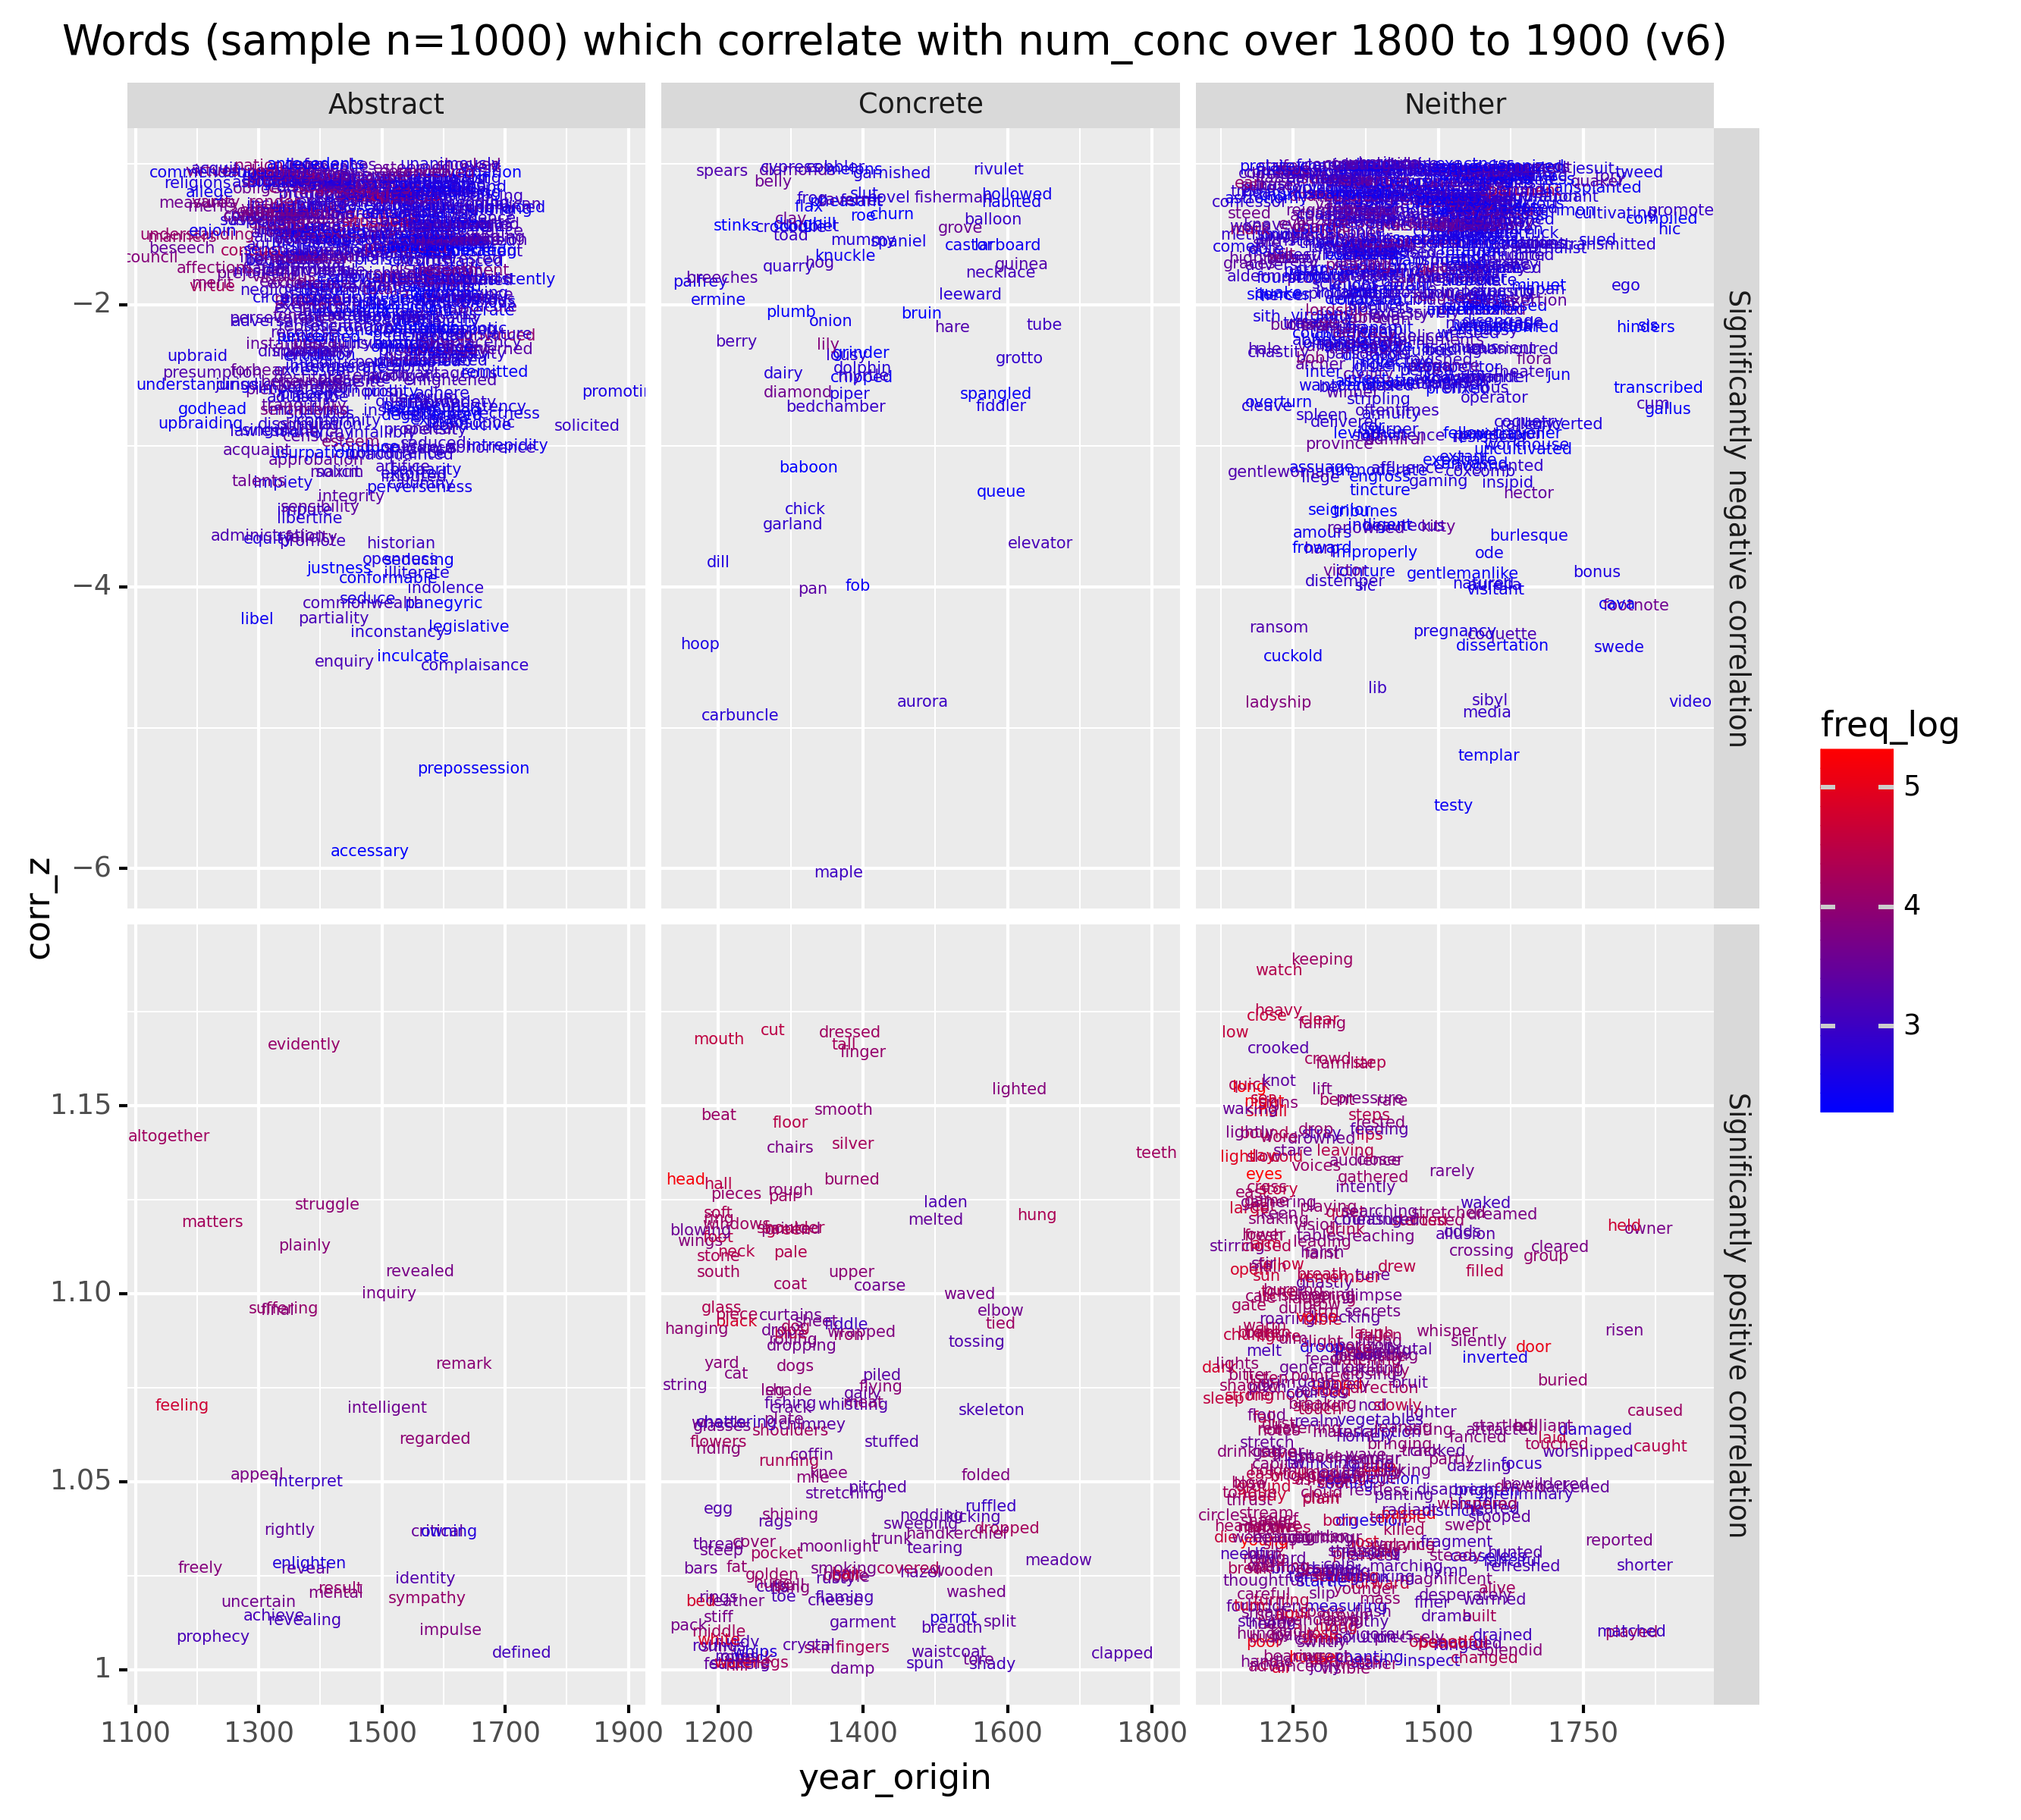

<ggplot: (8750690904629)>

In [66]:
samplen=1000
fig=p9.ggplot(
    p9.aes(x='year_origin',y='corr_z',color='freq_log',label='word'),
    data=cordf#.sample(n=samplen).dropna()
    
    # data=pd.concat([
    #     cordf[cordf.corr_z>=1].sample(n=samplen),
    #     cordf[cordf.corr_z<1].sample(n=samplen)
    # ])
)
# fig+=p9.geom_smooth(se=True,method='lm')
p9.options.figure_size=(9,9)
fig+=p9.geom_text(size=5)
fig+=p9.facet_grid('sign ~ absconc_grp',scales='free')
# fig+=p9.scale_color_brewer('RdBu')
# fig+=p9.geom_smooth(se=True,method='lm')
fig+=p9.scale_color_gradient(low="blue",high="red")
# fig+=p9.scale_y_log10()
fig+=p9.ggtitle(f'Words (sample n={samplen}) which correlate with {VALTYPE} over {DSTART} to {DEND} ({VNUM})')
fig.save(f'../../figures/fig.words_corr_with_trend.{VALTYPE}.{DSTART}-{DEND}.{NMFW}mfw.{VNUM}.{PERIOD_LEN}yrs.png')
fig

In [67]:
# Archive for credit plot

# fig=p9.ggplot(
#     p9.aes(x='year_origin',y='corr',label='word',color='freq_log'),
#     data=cordf[cordf.word.isin(fields[DEFAULT_ABS_FIELD])].query('corr>0.8')
# )
# # fig+=p9.geom_smooth(se=True,method='lm')
# p9.options.figure_size=(9,9)
# fig+=p9.geom_text(size=5)
# fig+=p9.scale_color_gradient(low="blue",high="red")
# fig.save('../../figures/fig.words_corr_with_trend.CREDIT.v2.png')
# fig

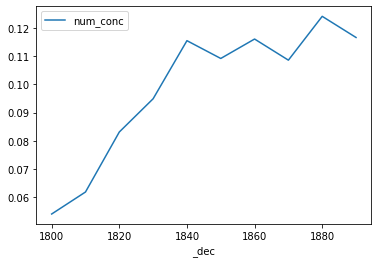

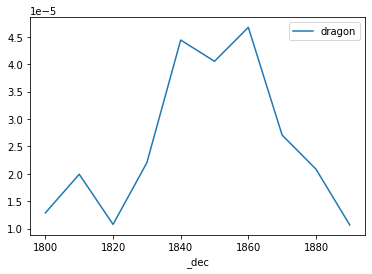

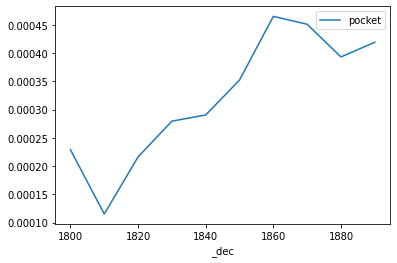

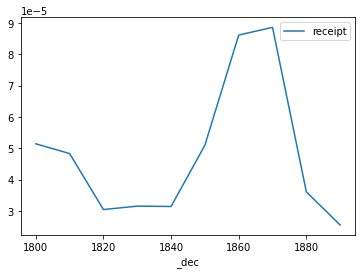

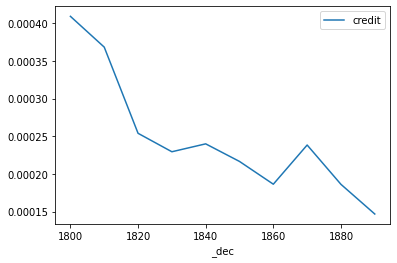

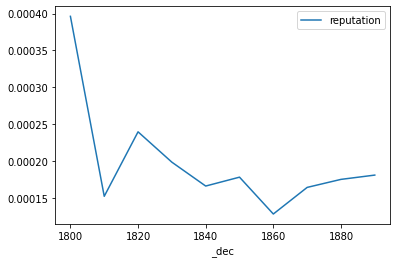

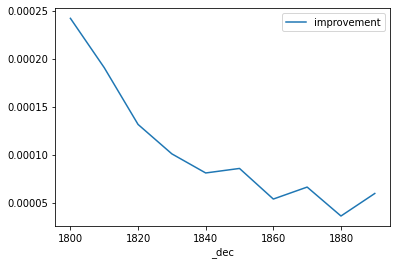

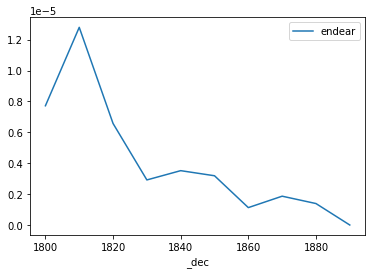

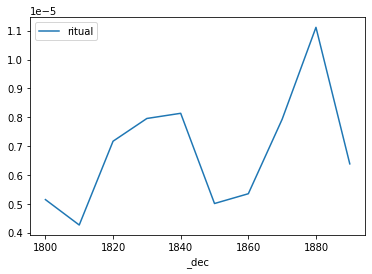

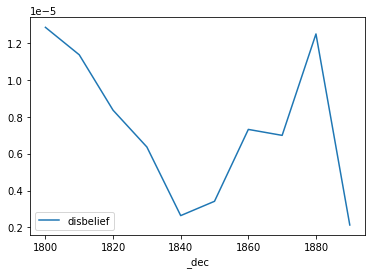

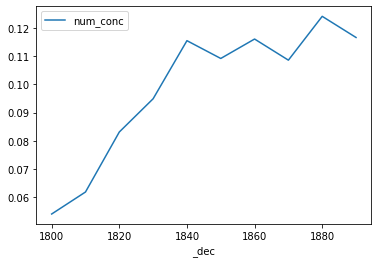

In [68]:
checkwords=[VALTYPE,'dragon','pocket','receipt','credit','reputation','improvement','endear','ritual','disbelief',VALTYPE]
for cw in checkwords:
    dfdone.reset_index().plot(x='_dec',y=cw)

In [69]:
cordf[cordf.word.isin(checkwords)].sort_values('corr_z')

,word,corr,dist,year_origin,absconc,absconc_grp,freq,freq_log,corr_z,sign
7220,endear,0.590481,0.409519,1580.0,-1.122466,Abstract,1627.0,3.211388,-2.883834,Significantly negative correlation
237,improvement,0.722435,0.277565,1453.0,-0.947628,Neither,2876.0,3.458789,-1.565885,Significantly negative correlation
1503,pocket,0.982428,0.017572,1280.0,1.297221,Concrete,15106.0,4.179149,1.030917,Significantly positive correlation
